<a href="https://colab.research.google.com/github/sreejagundu/EDA-project/blob/master/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning project on Exploratory Data Analysis of Car Features**

![alt text](https://www.import.io/wp-content/uploads/2019/09/data-analysis-blog.jpg)


# **Introduction**

The data comes from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price and some features. The objective of the project is to do data pre-processing and exploratory data analysis
of the dataset


## Data Description
Car Make

Car Model

Car Year (Marketing)

Engine Fuel Type

Engine Horse Power (HP)

Engine Cylinders

Transmission Type

Driven Wheels

Number of Doors

Market Category

Size of Vehicle

Type of Vehicle

Highway MPG

City MPG

Popularity (Twitter)

Manufacturer Suggested Retail Price

# Exploratory Data Analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis (IDA)  which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.

So in this project, we will explore the data and make it ready for modeling.

![](https://dataingovernment.blog.gov.uk/wp-content/uploads/sites/46/2016/08/Data-Science-Process-5-620x309.png)

## Importing data and required libraries for EDA



In [132]:
from google.colab import files
data_load = files.upload()

Saving data.csv to data (1).csv


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
df.head()   # displays top 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Types

Let's check for the datatypes of the given dataset because sometimes the MSRP of the car would be stored as a string. In that case, we have to convert that string to the integer data to plot the data via a graph. 

In [134]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [135]:
df.info

<bound method DataFrame.info of           Make       Model  Year  ... city mpg  Popularity   MSRP
0          BMW  1 Series M  2011  ...       19        3916  46135
1          BMW    1 Series  2011  ...       19        3916  40650
2          BMW    1 Series  2011  ...       20        3916  36350
3          BMW    1 Series  2011  ...       18        3916  29450
4          BMW    1 Series  2011  ...       18        3916  34500
...        ...         ...   ...  ...      ...         ...    ...
11909    Acura         ZDX  2012  ...       16         204  46120
11910    Acura         ZDX  2012  ...       16         204  56670
11911    Acura         ZDX  2012  ...       16         204  50620
11912    Acura         ZDX  2013  ...       16         204  50920
11913  Lincoln      Zephyr  2006  ...       17          61  28995

[11914 rows x 16 columns]>

## Summary Statistics

We can complete over view of basic summary stats of given data set.

In [136]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Checking For Null Values

In [137]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Dropping Irrelevant Columns

This is an essential step in EDA as sometimes there would be columns that we never use. In such case, dropping unused columns is useful to get better inferences. 

### Let's plot graph to inference what columns need to be dropped.

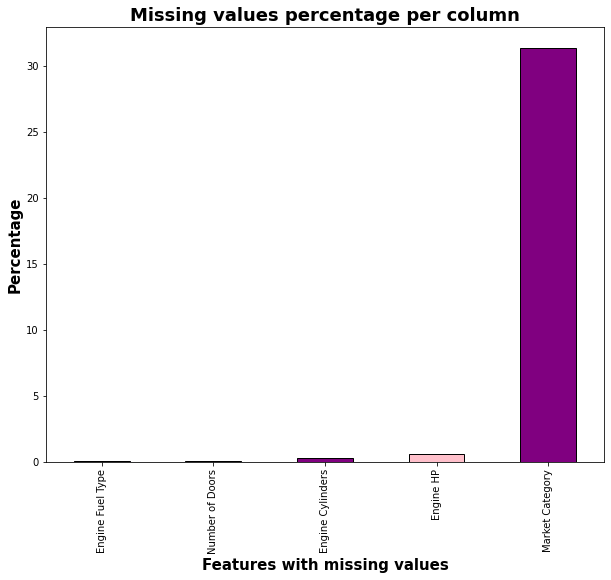

In [138]:
# Missing Values

missing_values = (df.isnull().sum() / len(df))*100
missing_values = missing_values.drop(missing_values[missing_values == 0].index).sort_values()
plt.figure(figsize=(10,8))
missing_values.plot.bar(color=('purple','pink'),edgecolor='black',)
plt.title('Missing values percentage per column', fontsize=18, weight='bold' )
plt.ylabel('Percentage', weight='bold', size=15)
plt.xlabel('Features with missing values', weight='bold',fontsize=15)

plt.show()

In [139]:
# Engine Fuel Type

EFT=df[['Engine Fuel Type','Engine HP','city mpg','highway MPG','Engine Cylinders','MSRP']].groupby(['Engine Fuel Type']).agg('median').sort_values(by=['Engine HP'],ascending=False)
EFT1= EFT.style.background_gradient(cmap='Greens')
EFT1

,Engine HP,city mpg,highway MPG,Engine Cylinders,MSRP
Engine Fuel Type,,,,,
flex-fuel (premium unleaded required/E85),510.000000,13.000000,19.000000,8.000000,142547.500000
premium unleaded (required),333.000000,17.000000,24.000000,6.000000,60300.000000
flex-fuel (unleaded/E85),285.000000,17.000000,22.000000,6.000000,34405.000000
premium unleaded (recommended),248.000000,21.000000,29.000000,4.000000,36990.000000
flex-fuel (premium unleaded recommended/E85),220.000000,18.000000,27.500000,4.000000,44080.000000
regular unleaded,185.000000,19.000000,26.000000,6.000000,23617.500000
diesel,150.000000,28.000000,39.000000,4.000000,38785.000000
electric,140.000000,121.000000,101.000000,0.000000,36285.000000
natural gas,110.000000,27.000000,38.000000,4.000000,28065.000000


As per the graph, Market Category has many missing values. So its better to drop this column as it has insufficient and missing data.

Model is only for the dataset. They do not reflect vehicle sales on the market. A brand with many different models will obtain a higher popularity and proportion than another one with fewer models.So we can drop Model column.

Number of Doors and Engine Fuel Type also has no effect on sales and price. Hence we can drop these columns to build effective model.

In [140]:
df = df.drop(['Market Category','Model','Number of Doors','Engine Fuel Type'], axis=1)
df.shape

(11914, 12)

##  Renaming the columns

At times, the column names can be confusing or unreadable. So its better to rename column names to have a better understanding of our data set and it also improves the readability of our data set.

In [141]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.columns

Index(['Make', 'Year', 'HP', 'Cylinders', 'Transmission', 'Drive Mode',
       'Vehicle Size', 'Vehicle Style', 'MPG-H', 'MPG-C', 'Popularity',
       'Price'],
      dtype='object')

## Dropping the duplicate rows

One of the most common data cleaning tasks is to make a decision on how to deal with duplicate rows in a data set. This is necessary as a huge data set  containing more than 10, 000 rows often have some duplicate data.Hence here we remove all the duplicate values from the data set.



In [142]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (801, 12)


In [143]:
df = df.drop_duplicates()
df.shape

(11113, 12)

## Dropping the missing or null values

This is mostly similar to the previous step but here, all the missing values are detected and are dropped. Now, this is not the best approach and generally people just replace the missing values with the mean or the average of that column. This helps in fine tuning the model performance as more the data, a model has the better it performs. But the objective of this project is to do EDA and its fine to drop missing values and also the number of missing values is small compared to the entire dataset

In [144]:
df.isnull().sum()  # Checking for null values

Make              0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

In [145]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make             11015
Year             11015
HP               11015
Cylinders        11015
Transmission     11015
Drive Mode       11015
Vehicle Size     11015
Vehicle Style    11015
MPG-H            11015
MPG-C            11015
Popularity       11015
Price            11015
dtype: int64

In [146]:
df.isnull().sum(),df.shape

(Make             0
 Year             0
 HP               0
 Cylinders        0
 Transmission     0
 Drive Mode       0
 Vehicle Size     0
 Vehicle Style    0
 MPG-H            0
 MPG-C            0
 Popularity       0
 Price            0
 dtype: int64, (11015, 12))

## Detecting Outliers

In statistics, an outlier is an observation point that is distant from other observations.The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data. Sometimes they can be very high or very low.

It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. 

Shown below are the box plot of overall data, Price, Cylinders, Horsepower and MPG. Herein all the plots, you can find some points are outside the box they are none other than outliers.

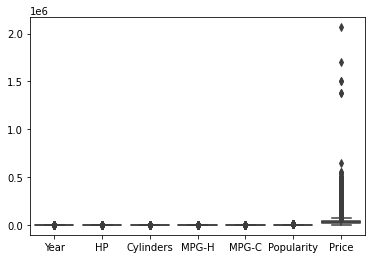

In [147]:
#  Boxplot of Over all data
sns.boxplot(data=df)  

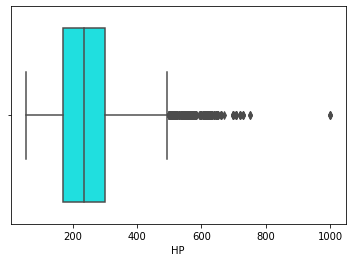

In [148]:
# Boxplot of Horse Power (HP)
sns.boxplot(x="HP", data=df,color='aqua')

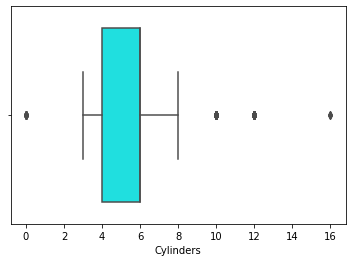

In [149]:
# Boxplot of Cylinders
sns.boxplot(x=df['Cylinders'],color='aqua')

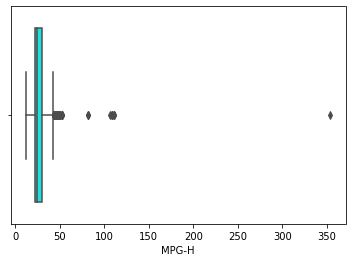

In [150]:
# Boxplot of MPG-H
sns.boxplot(x=df['MPG-H'],color='aqua')

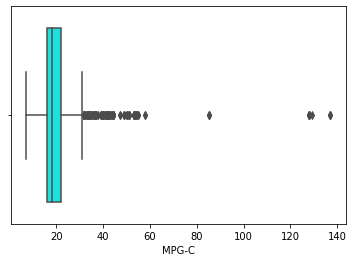

In [151]:
#  Boxplot of MPG-C
sns.boxplot(x=df['MPG-C'],color='aqua')

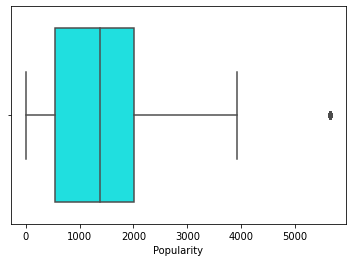

In [152]:
#  Boxplot of Popularity
sns.boxplot(x='Popularity',data=df,color='aqua')

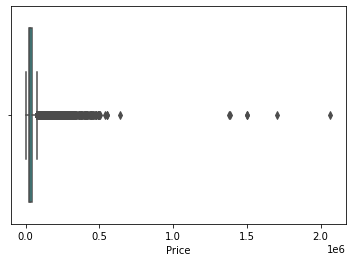

In [153]:
#  Boxplot of Price
sns.boxplot(x='Price',data=df,color='aqua')

## Removing Outliers
Now I'm going to perform technique called Interquartile range(IQR) score to remove the outliers.

In [154]:
# Finding IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              131.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21452.5
dtype: float64


In [155]:
# Removing Outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8543, 12)

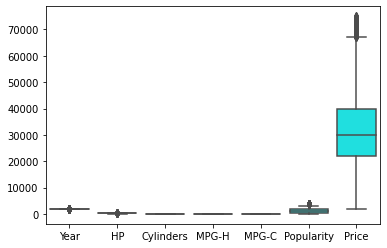

In [156]:
#  Boxplot of Over all data after removing outliers
sns.boxplot(data=df,color='aqua')  

In [157]:
# Reindex the dataframe
df.index = np.arange(df.shape[0])

## Most Represented Car Brands

This pie chart depicts the top 10 most represented car brands from the dataset.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


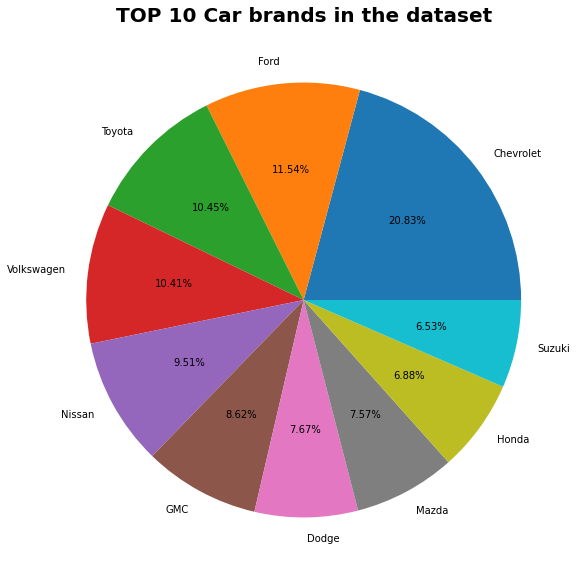

In [158]:
car=df['Make'].value_counts().head(10).to_frame()
m= car.style.background_gradient(cmap='Greens')
labels= ['Chevrolet','Ford','Toyota','Volkswagen','Nissan','GMC','Dodge','Mazda','Honda','Suzuki']
sizes= ['1027','761','569','515','513','469','425','378','373','339']
values=df['Make'].value_counts().head(10).to_frame()

# Data visualization
plt.figure(figsize=(10,10))
plt.pie(values,explode=None,labels=labels,autopct='%1.2f%%')
plt.title('TOP 10 Car brands in the dataset',color='black',fontsize=20,weight='bold')
plt.show()

##  Average price

Here is the average price among the top 10 car brands.

In [159]:
prices = df[['Make','Price']].loc[
               (df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Mazda')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Suzuki')].groupby('Make').mean()

print('Average Prices of Top 10 Car Brands\n')
print(prices)

Average Prices of Top 10 Car Brands

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Suzuki      18168.241888
Toyota      27769.421793
Volkswagen  29032.817476


In [160]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
print("Over",len(counts),"different car brands, the 10 most recurrent car brands in that dataset represents",sum(counts[:10]),"% of the total number of cars !")

Over 37 different car brands, the 10 most recurrent car brands in that dataset represents 57.708065082523696 % of the total number of cars !


##  Correlation Matrix 

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.


In [161]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325205,-0.106320,0.373609,0.335121,0.199807,0.590797
HP,0.325205,1.000000,0.734182,-0.453474,-0.554869,0.095051,0.746144
Cylinders,-0.106320,0.734182,1.000000,-0.691401,-0.746340,0.013596,0.389618
MPG-H,0.373609,-0.453474,-0.691401,1.000000,0.937008,0.092970,-0.121428
MPG-C,0.335121,-0.554869,-0.746340,0.937008,1.000000,0.080868,-0.197850
Popularity,0.199807,0.095051,0.013596,0.092970,0.080868,1.000000,0.112799
Price,0.590797,0.746144,0.389618,-0.121428,-0.197850,0.112799,1.000000


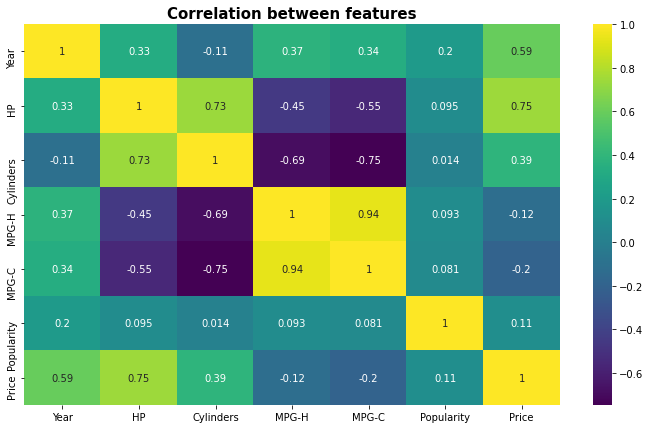

In [162]:
# Heatmap to plot correlation matrix
df_corr=df.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(df_corr, cmap='viridis',annot=True)
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=15)
plt.show()

### Inferences from Heat map

There is a positive correlation between:

*   Engine HP and Engine Cylinders
*   Engine HP and the Price 

*   Engine Cylinders and the Price 

There is a negative correlation between:
   

*   Highway MPG and City MPG
*   Highway MPG and Price

*   City MPG and Price

Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.



### Let's plot the graphs to have a better understading of these correlations.

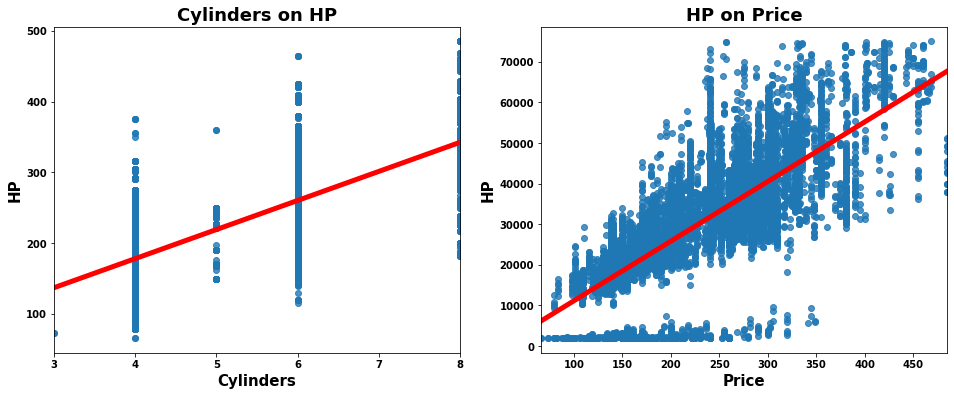

In [163]:
# Correlation between HP, Cylinders and Price

plt.figure(figsize=(16,6))
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.regplot(x=df["Cylinders"], y=df["HP"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('Cylinders on HP', weight='bold', fontsize=18)
plt.xlabel('Cylinders', weight='bold',fontsize=15)
plt.ylabel('HP', weight='bold', fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')


#first row sec col
ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=df["HP"], y=df["Price"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('HP on Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=15)
plt.ylabel('HP', weight='bold', fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()

An engine with more cylinders produces more power, and more power means a high Price.

(array([10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 8 Text major ticklabel objects>)

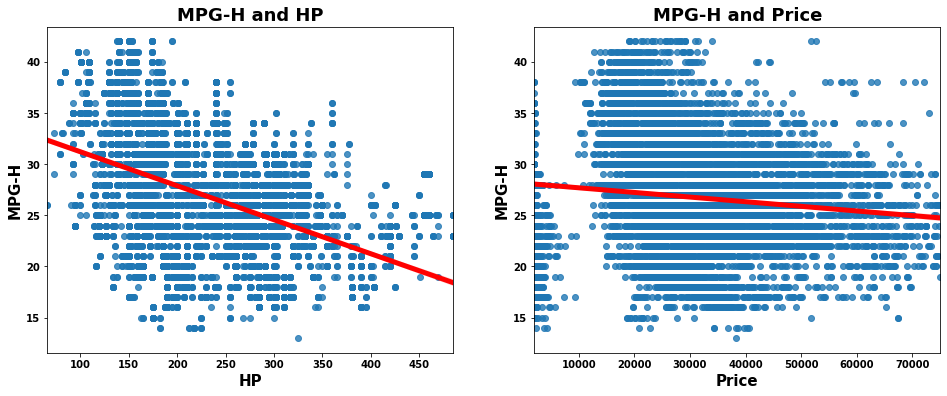

In [164]:
# Correlation between MPG-H, HP and Price

plt.figure(figsize=(16,6))
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.regplot(x=df["HP"], y=df["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-H and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=15)
plt.ylabel('MPG-H', weight='bold', fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#first row sec col
ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=df["Price"], y=df["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-H and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=15)
plt.ylabel('MPG-H', weight='bold', fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

(array([ 5., 10., 15., 20., 25., 30., 35.]),
 <a list of 7 Text major ticklabel objects>)

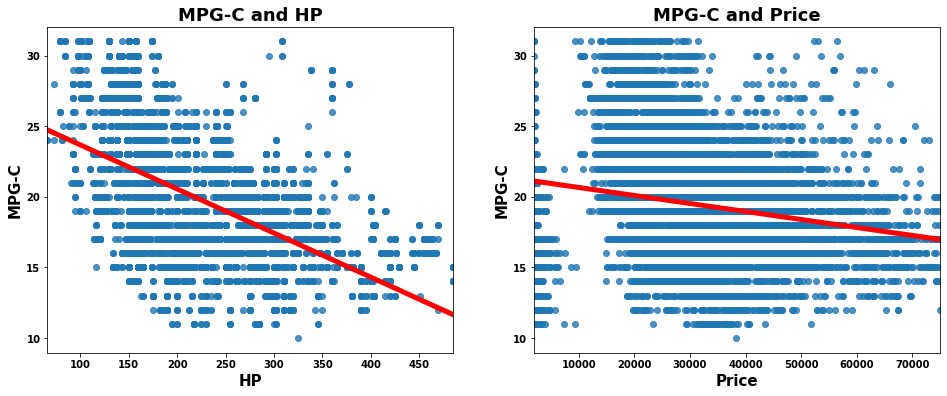

In [165]:
# Correlation between MPG-C, HP and Price

plt.figure(figsize=(16,6))
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.regplot(x=df["HP"], y=df["MPG-C"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-C and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=15)
plt.ylabel('MPG-C', weight='bold', fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#first row sec col
ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=df["Price"], y=df["MPG-C"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-C and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=15)
plt.ylabel('MPG-C', weight='bold', fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

## Inference
From both the heatmap and the plots above, we can see a negative correlation between highway and city mpg ( how far the car is able to travel for every gallon of fuel it uses in the highway and around the city) and the Engine HP.

Horsepower is a measure of work that can be performed over a given time by an engine. The more power you have the higher the speed you can do it at during a period of time. Generally, higher horsepower comes from burning more fuel, so get lower mpg, more horsepower means less fuel economy.

Basically, race cars and sports cars such as Corvette Have a High Engine Horsepower and a low mpg since they can speed and thus burn more fuel.

Cars like FIAT have a lower Engine Horsepower but a higher mpg since the speed is limited and considered to be more fuel economy.


### Let's now check how other features are correlated to Price

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]), <a list of 11 Text major ticklabel objects>)

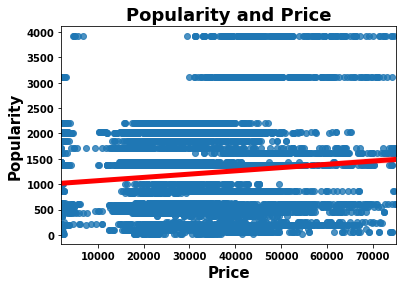

In [166]:
#Popularity and Price
sns.regplot(x=df["Price"], y=df["Popularity"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('Popularity and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=15)
plt.ylabel('Popularity', weight='bold', fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

We can see that Price of popular car brands is higher. It implies that there is a increase in price with popularity of car brands.

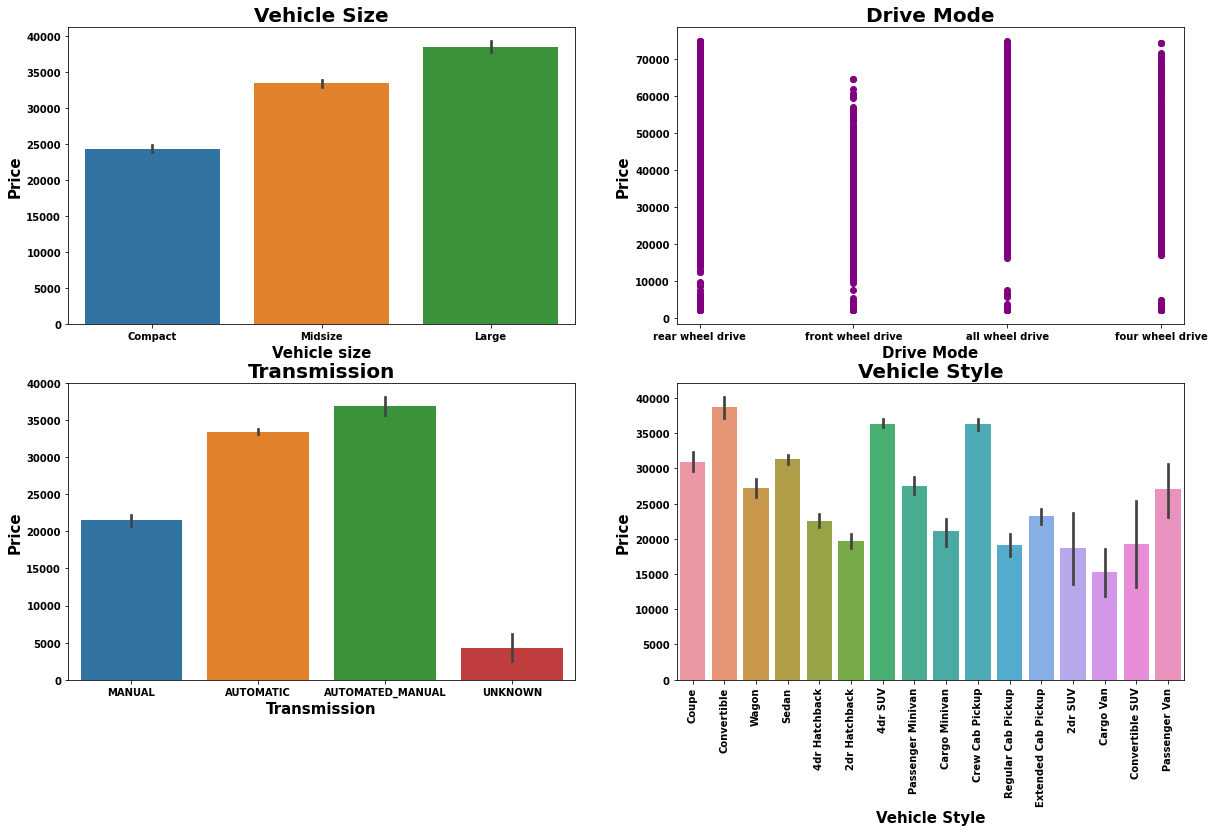

In [167]:
fig= plt.figure(figsize=(20,12))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.barplot(x=df['Vehicle Size'], y=df['Price'])
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlabel('Vehicle size', weight='bold',fontsize=15)
plt.ylabel('Price', weight='bold',fontsize=15)
plt.title('Vehicle Size', weight='bold', fontsize=20)

#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.scatter(x=df['Drive Mode'], y=df['Price'], color='purple')
plt.xlabel('Drive Mode', weight='bold',fontsize=15)
plt.ylabel('Price', weight='bold',fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title('Drive Mode', weight='bold', fontsize=20)

#Second row first column

ax1 = plt.subplot2grid((2,2), (1, 0))
sns.barplot(x=df['Transmission'], y=df['Price'])
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlabel('Transmission', weight='bold',fontsize=15)
plt.ylabel('Price', weight='bold',fontsize=15)
plt.title('Transmission', weight='bold', fontsize=20)

#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
sns.barplot(x=df['Vehicle Style'], y=df['Price'])
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlabel('Vehicle Style', weight='bold',fontsize=15)
plt.ylabel('Price', weight='bold',fontsize=15)
plt.title('Vehicle Style', weight='bold', fontsize=20)
plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'Price')

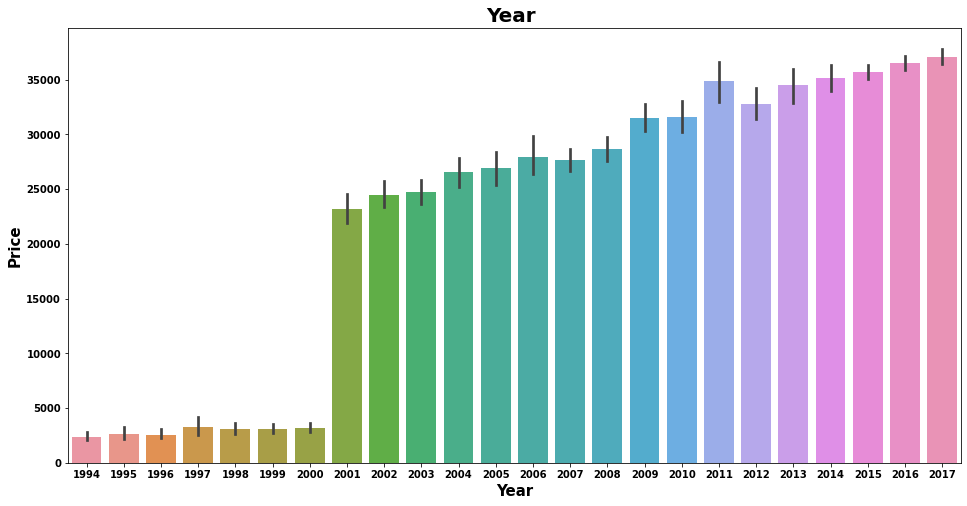

In [168]:
plt.figure(figsize=(16,8))
sns.barplot(df['Year'],df['Price'])
plt.title('Year ', weight='bold', fontsize=20)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlabel('Year', weight='bold',fontsize=15)
plt.ylabel('Price', weight='bold',fontsize=15)

### The following features are contributing to a High Price :


*   Vehicle Size : Large
*   Drive Mode : All modes

*   Transmission : Automated-Manual (It consists of a conventional manual transmission with an electronically-controlled hydraulic clutch and computerized gear shift control, and the driver can usually override the computer control with a clutchless "manual" mode.)
*   Vehicle Style : 
1.   Coupe, Convertible, 4dr SUV and Sedan styles : Make the model worth more in terms of the price
2.   Cargo Van, 2dr Suv, Convertible SUV and 2 dr Hatchback : Make the model worth less in terms of the price


*   Year: The Price was constant from years 1994 to 2000. But suddenly the price rose in the year 2001, 2011 and gradually kept increasing till 2017.The highest price was recorded in the year 2017.


*   Price increases with Popularity. More is the popularity of a car, higher is the Price.



## Conclusion

We can thus conclude from various plotting and observations that:


*   High numbers of Cylinders produce Higher Engine Horsepower.
*   High Engine Horsepower means a High MSRP and a low MPG value.

*   Cars with all drive modes, large size, Automated manual transmission  and Convertible Style marks high Price Values.


*   There was an increase in price of cars every year.


*   More popular a car brand, higher is its Price.




# Model Building

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

![alt text](https://image.slidesharecdn.com/buildingaperformingmlmodelfromatoz-170129174308/95/building-a-performing-machine-learning-model-from-a-to-z-5-638.jpg?cb=1486044818)

In [169]:
df.dtypes

Make              object
Year               int64
HP               float64
Cylinders        float64
Transmission      object
Drive Mode        object
Vehicle Size      object
Vehicle Style     object
MPG-H              int64
MPG-C              int64
Popularity         int64
Price              int64
dtype: object

In [170]:
df.info

<bound method DataFrame.info of          Make  Year     HP  Cylinders  ... MPG-H MPG-C Popularity  Price
0         BMW  2011  335.0        6.0  ...    26    19       3916  46135
1         BMW  2011  300.0        6.0  ...    28    19       3916  40650
2         BMW  2011  300.0        6.0  ...    28    20       3916  36350
3         BMW  2011  230.0        6.0  ...    28    18       3916  29450
4         BMW  2011  230.0        6.0  ...    28    18       3916  34500
...       ...   ...    ...        ...  ...   ...   ...        ...    ...
8538    Acura  2012  300.0        6.0  ...    23    16        204  46120
8539    Acura  2012  300.0        6.0  ...    23    16        204  56670
8540    Acura  2012  300.0        6.0  ...    23    16        204  50620
8541    Acura  2013  300.0        6.0  ...    23    16        204  50920
8542  Lincoln  2006  221.0        6.0  ...    26    17         61  28995

[8543 rows x 12 columns]>

In [171]:
# Assigning values
target = 'Price'
X = df[[ 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [172]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

## Train-Test Split

Splitting the dataset into 80 and 20 ratio to built a model with target variable as Price.

In [173]:
#Train test spilt

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6834, 5) (6834, 1)
(1709, 5) (1709, 1)


## Linear Regression

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Fitting
linear = LinearRegression()
linear.fit(X_train, y_train)

# Predict
y_test_predict = linear.predict(X_test)
print(y_test_predict)
y_train_predict= linear.predict(X_train)
y_train_predict
print('\n')

#To retrieve the intercept:
print(linear.intercept_)
#For retrieving the slope:
print(linear.coef_)


[[-1.30246545]
 [ 1.87418836]
 [-0.28668975]
 ...
 [ 1.71962577]
 [-0.44792943]
 [ 1.33114951]]


[-0.00401723]
[[ 0.36641719  0.69092243 -0.07386846 -0.02205341  0.03011248]]


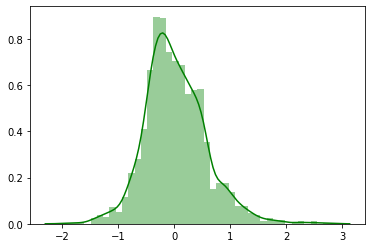

In [175]:
sns.distplot(y_test-y_test_predict,color='green')

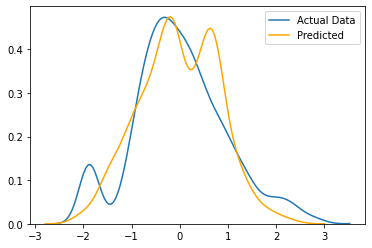

In [176]:
sns.distplot(y_test,label='Actual Data',hist=False)
sns.distplot(y_test_predict,label='Predicted',color='orange',hist=False)

In [177]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print('mean_squared_error_y_train: ',mean_squared_error(y_train,y_train_predict))
print('mean_squared_error_y_test: ',mean_squared_error(y_test,y_test_predict))
print('\n')
print('r2_score_y_train: ',r2_score(y_train,y_train_predict))
print('r2_score_y_test: ',r2_score(y_test,y_test_predict))
print('\n')
print('mean_absolute_error_y_train: ',mean_absolute_error(y_train,y_train_predict))
print('mean_absolute_error_y_test: ',mean_absolute_error(y_test,y_test_predict))

mean_squared_error_y_train:  0.3076311888450113
mean_squared_error_y_test:  0.29946462599627227


r2_score_y_train:  0.6987367251026827
r2_score_y_test:  0.6728815220483313


mean_absolute_error_y_train:  0.42527416510330457
mean_absolute_error_y_test:  0.4191052781067494


In [178]:
#metrics MSE
from sklearn import metrics
print('RMSE_y_train: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))
print('RMSE_y_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))

RMSE_y_train:  0.5546451017046948
RMSE_y_test:  0.5472336119028803


## Random Forest for Reggresion

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees habit of overfitting to their training set.

In [179]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [180]:
# predicting a new value 
y_pred = regressor.predict(X_test)

# print the predicted price 
print('Value for regressor predict=',y_pred)


Value for regressor predict= [-1.90587231  2.10617421 -0.48171542 ...  2.34804844 -0.22525207
  0.85833584]


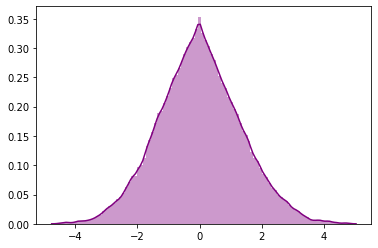

In [181]:
sns.distplot(y_test-y_pred,color='purple',bins=100)

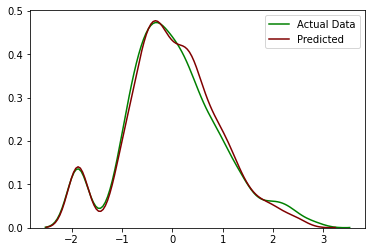

In [182]:
sns.distplot(y_test,label='Actual Data',color='green',hist=False)
sns.distplot(y_pred,label='Predicted',color='maroon',hist=False)

In [183]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print('mean_squared_error_y_test: ',mean_squared_error(y_test,y_pred))
print('r2_score_y_test: ',r2_score(y_test,y_pred))
print('mean_absolute_error_y_test: ',mean_absolute_error(y_test,y_pred))

mean_squared_error_y_test:  0.07951789926376432
r2_score_y_test:  0.9131390758072357
mean_absolute_error_y_test:  0.19606708403629247


In [184]:
#metrics MSE
from sklearn import metrics
print('RMSE_y_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


RMSE_y_test:  0.2819891828843162


## Support Vector Regression

SVR uses the same basic idea as Support Vector Machine (SVM), a classification algorithm, but applies it to predict real values rather than a class. SVR acknowledges the presence of non-linearity in the data and provides a proficient prediction model.

In [185]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


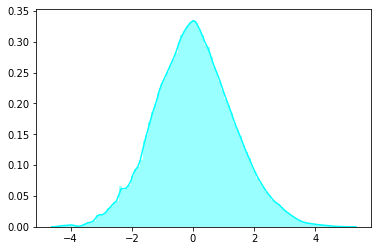

In [186]:
sns.distplot(y_test-y_pred,color='aqua',bins=100)

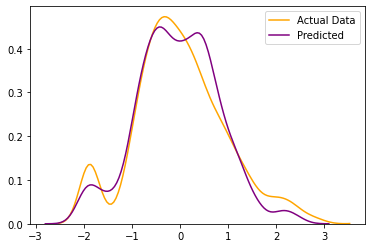

In [187]:
sns.distplot(y_test,label='Actual Data',color='orange',hist=False)
sns.distplot(y_pred,label='Predicted',color='purple',hist=False)

In [188]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print('mean_squared_error_y_test: ',mean_squared_error(y_test,y_pred))
print('r2_score_y_test: ',r2_score(y_test,y_pred))
print('mean_absolute_error_y_test: ',mean_absolute_error(y_test,y_pred))

mean_squared_error_y_test:  0.2198126869876335
r2_score_y_test:  0.7598888637926928
mean_absolute_error_y_test:  0.32584049276894084


In [189]:
#metrics MSE
from sklearn import metrics
print('RMSE_y_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE_y_test:  0.46884185711989657


## Decision Tree

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [190]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [191]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [192]:
# test the output by changing values
y_pred1 = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)


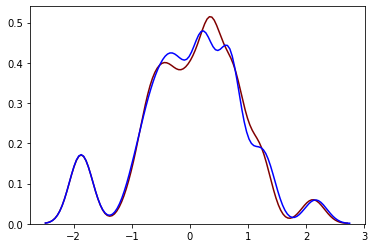

In [193]:
sns.distplot(y_pred1,color='maroon',hist=False)
sns.distplot(y_pred2,color='blue',hist=False)

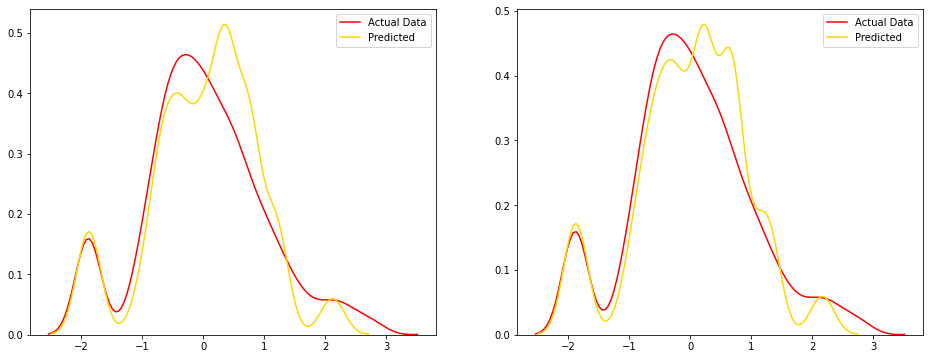

In [194]:
plt.figure(figsize=(16,6))
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(y_test,label='Actual Data',color='red',hist=False)
sns.distplot(y_pred1,label='Predicted',color='gold',hist=False)

ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(y_test,label='Actual Data',color='red',hist=False)
sns.distplot(y_pred2,label='Predicted',color='gold',hist=False)

In [195]:

print('mean_squared_error max depth  4: ',mean_squared_error(y_test,y_pred1))
print('r2_score max depth 4: ',r2_score(y_test,y_pred1))
print('RMSE max depth 4: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('\n')
print('mean_squared_error for max depth 5: ',mean_squared_error(y_test,y_pred2))
print('r2_score max depth 5: ',r2_score(y_test,y_pred2))
print('RMSE max depth 5: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))



mean_squared_error max depth  4:  0.22155970817965376
r2_score max depth 4:  0.7738063756478302
RMSE max depth 4:  0.4707012940067764


mean_squared_error for max depth 5:  0.20041498466991217
r2_score max depth 5:  0.7953933405607593
RMSE max depth 5:  0.4476773220411239


# Inference

From the above models, we can infer that the Random Forest Regression model predicts the given dataset more precise and accurately than other models. 

Features such as the safety measures and resale value can be added to improve the model.